<a href="https://colab.research.google.com/github/vtttuyen/DataAnalystDeepLearning1/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt
# để chọn ngẫu nhiên các tấm ảnh
import random
# để load dữ liệu trong tập mẫu
from keras.datasets import mnist
# các hàm sau để xây dựng mô hình mạng neural 
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation

In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print("x_train shape",x_train.shape)

x_train shape (60000, 28, 28)


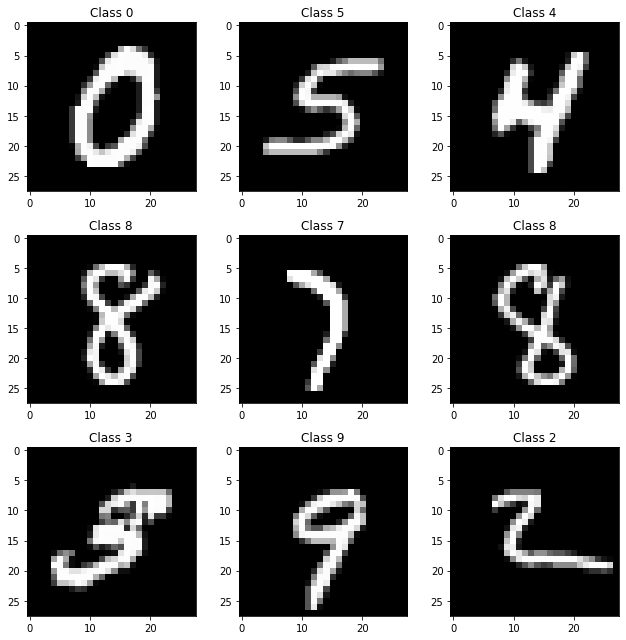

In [9]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

In [10]:
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')

x_train/=255


print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)


Diễn giải:

model= Sequential(): Khai báo mô hình model.add(...): Thêm một thành phần vào trong mô hình Dense(number, input_shape(,)): kết nối tất cả các phần tử layer hiện tại với toàn bộ các phần tử của layer trước đó. Giá trị đầu tiên trong Dense bằng number thể hiện việc có number phần tử ở layer này. input_shape = (,) chính là kích thước của dữ liệu đầu vào. Kích thước này là một tuple nên ta cần viết dưới dạng tuple, thí dụ (784,) Activation ('relu/softmax/linear'):

In [13]:
model= Sequential()
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))

In [14]:
model.add(Dense(40))
model.add(Activation('relu'))

In [15]:
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                440       
                                                                 
 activation_1 (Activation)   (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 8,700
Trainable params: 8,700
Non-trainabl

Hàm loss function

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=5)

predicted_classes=model.predict(x_test)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6830 - accuracy: 0.7962
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.9104
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9238
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.9311
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2224 - accuracy: 0.9371


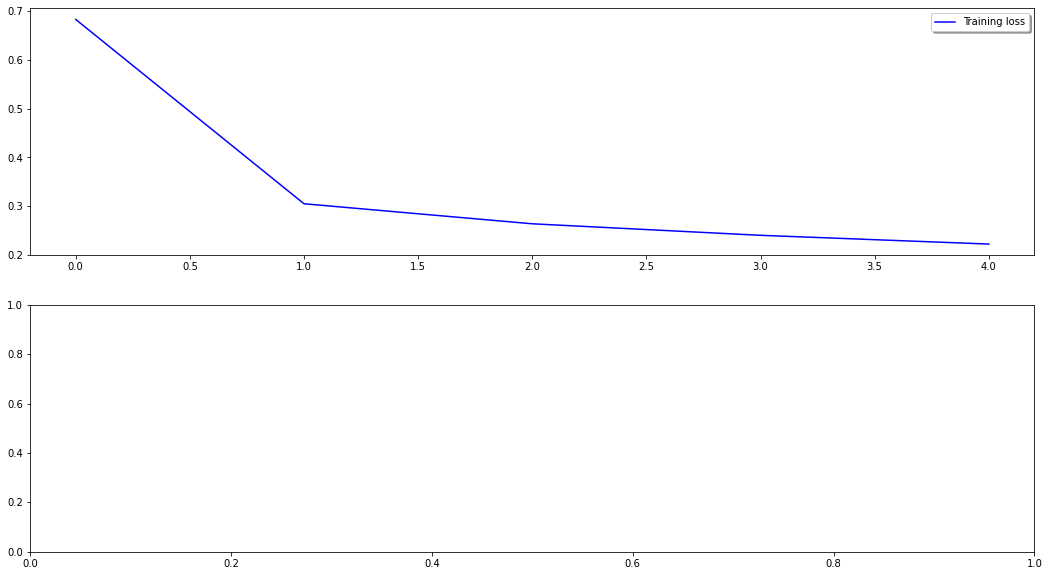

In [17]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

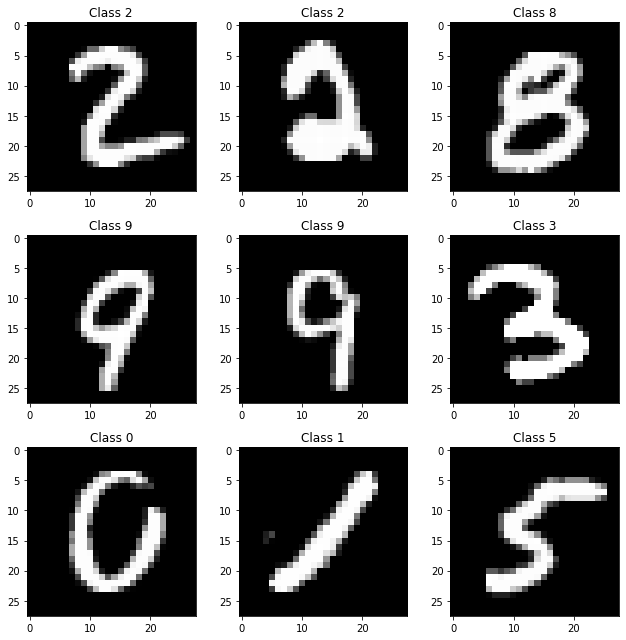

In [18]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()

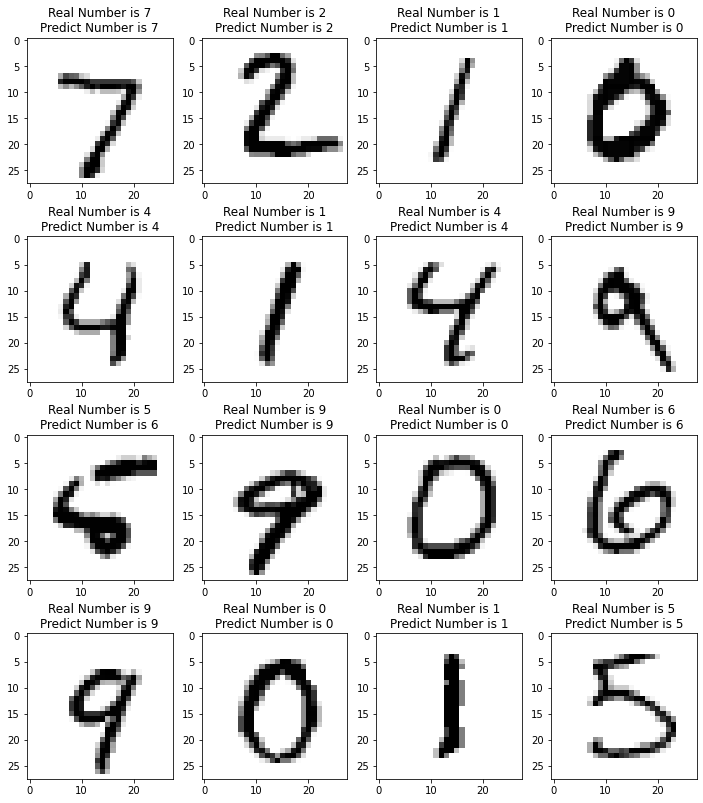

In [19]:
y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");